In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [3]:
# flops, emd, error 
baseline_15 = [6544, 1.3308, 0.393]
baseline_20 = [6544, 1.2385, 0.359]
baseline_50 = [6544, 1.1703, 0.339]
baseline_100 = [6544, 1.138, 0.324]

In [4]:
def make_plots(filename, baseline, plot_error=False):
       df = pd.read_csv('./results/' + filename + '.csv')

       if plot_error:
              emd = df.loc[:,"EMD"]
       else:
              emd = df.loc[:,"EMD_error"]
       ops = df.loc[:,"OPs"]
       info = df.loc[:,'info']

       fig, ax = plt.subplots()

       labled = [False,False,False,False]
       for o,e,i in zip(ops, emd, info):
              num_layers = int(i.split('[')[1].split(']')[0].count(','))+1
              if num_layers == 0:
                     if labled[0]:
                            ax.scatter(e,o, color='lightsteelblue')
                     else:
                            ax.scatter(e,o, color='lightsteelblue', label='0 CNN layer')
                            labled[0] = True
              elif num_layers == 1:
                     if labled[1]:
                            ax.scatter(e,o, color='cornflowerblue')
                     else:
                            ax.scatter(e,o, color='cornflowerblue', label='1 CNN layer')
                            labled[1] = True
              elif num_layers == 2:
                     if labled[2]:
                            ax.scatter(e,o, color='royalblue')
                     else:
                            ax.scatter(e,o, color='royalblue', label='2 CNN layer')
                            labled[2] = True
              else:
                     if labled[3]:
                            ax.scatter(e,o, color='midnightblue')
                     else:
                            ax.scatter(e,o, color='midnightblue', label='3 CNN layer')
                            labled[3] = True
       if plot_error:
              ax.scatter(baseline[2], baseline[0], marker='*', c='gold', label="baseline model")
       else:
              ax.scatter(baseline[1], baseline[0], marker='*', c='gold', label="baseline model")

       x_lower = min(emd)
       # x_upper = x_lower * 2.5
       y_lower = min(ops)
       # y_upper = y_upper * 2.5

       x_upper = 4
       y_upper = 60000
       
       ax.set_yscale('log')
       ax.set(xlim=(x_lower, x_upper),
              ylim=(y_lower, y_upper))
       plt.legend(loc='upper right')
       plt.ylabel('OPs', fontsize=16)
       if plot_error:
              plt.xlabel('EMD', fontsize=18)
              plt.savefig('EMD_vs_OPS.jpg', dpi=1000)
       else:
              plt.xlabel('Error', fontsize=18)
              plt.savefig('EMD_Error_vs_OPS.jpg', dpi=1000)

UnboundLocalError: local variable 'y_upper' referenced before assignment

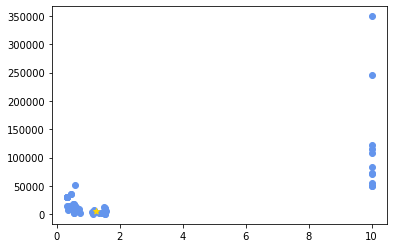

In [5]:
make_plots("Trials_Run_5_OPs", baseline_20)